In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import skimage

In [35]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def plt_show(name,img1,img2):
    plt.figure(figsize = (10,10))
    plt.subplot(121);plt.imshow(img1,cmap='gray');plt.title(name)
    plt.subplot(122);plt.imshow(img2,cmap='gray');plt.title('Oringal')
    plt.show()

In [5]:
def plt_show1(name,img1,img2):
    plt.figure(figsize = (10,10))
    plt.subplot(121);plt.imshow(img1);plt.title(name)
    plt.subplot(122);plt.imshow(img2);plt.title('Oringal')
    plt.show()

### Search for straight lines by the classic Hough

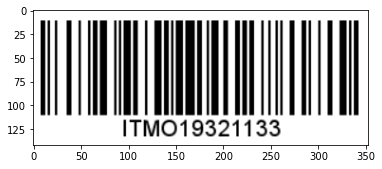

In [6]:
img = cv2.imread("barCode.png")
plt.imshow(img)

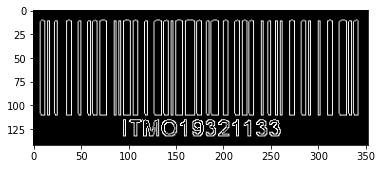

In [16]:
fn = "barCode.png"
I = cv2 . imread ( fn , cv2 . IMREAD_COLOR )
Iedge = cv2 . Canny (I , 50 , 200 , None , 3)
plt.imshow(Iedge,cmap = "gray")

Text(0.5, 1.0, 'Classic')

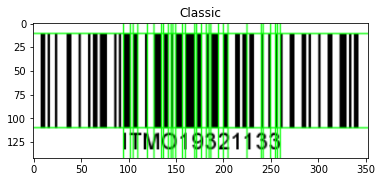

In [46]:
#execute the Hough line transform
lines = cv2 . HoughLines ( Iedge , 1 , np . pi / 180 ,100)

Iout = I . copy ()
if lines is not None :
    for i in range (0 , len ( lines )):
        rho = lines [i][0][0]
        theta = lines [ i ][0][1]
        a , b = math . cos ( theta ) , math . sin ( theta )
        x0 , y0 = a * rho , b * rho
        pt1 = np . int32 (( x0 - 1000 * b ,y0 + 1000 * a ))
        pt2 = np . int32 (( x0 + 1000 * b ,y0 - 1000 * a ))
        cv2 . line ( Iout , pt1 , pt2 , (0 , 255 , 0) ,1 , cv2.LINE_AA )
plt.imshow(Iout);plt.title("Classic")

### use probabilstic Hough line transform

Text(0.5, 1.0, 'Probabilistic')

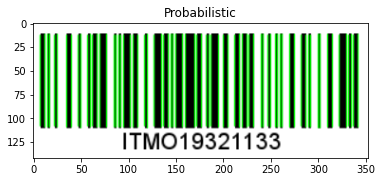

In [17]:
linesP = cv2 . HoughLinesP ( Iedge , 1 ,np . pi / 180 , 50 , None , 50 , 4)
IoutP = I . copy ()
if linesP is not None :
    for i in range (0 , len ( linesP )):
        l = linesP [ i ][0]
        cv2 . line ( IoutP , ( l [0] , l [1]) ,
                    ( l [2] , l [3]) , (0 , 255 , 0) ,
                    1 ,cv2 . LINE_AA )

plt.imshow(IoutP);plt.title("Probabilistic")

### use sciKit lib

Text(0.5, 1.0, 'skiimage')

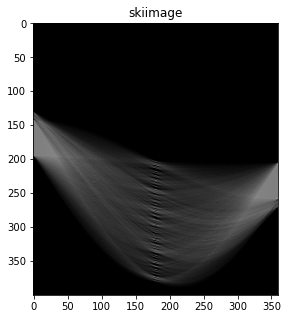

In [40]:
angles = np . linspace ( - np . pi / 2 , np . pi / 2 ,360 , endpoint = False )
Ih , theta , rho = skimage . transform . hough_line ( Iedge ,theta = angles )
Iski =  cv2 . resize (Ih . astype ( np . float32 ) / np . max ( Ih ) ,( Ih . shape [1] , 400))
plt.figure(figsize = (5,5));plt.imshow(Iski,cmap = "gray");plt.title("skiimage")

In [37]:
#用opencv库打开看看
cv_show("skiimage",Iski)

### Search for the circles

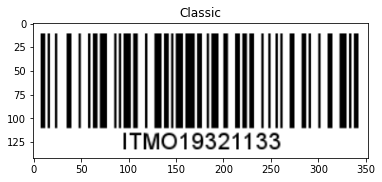

In [44]:
#execute the Hough line transform
lines = cv2.HoughCircles(Iedge,cv2.HOUGH_GRADIENT,1,30,param1=200,param2=30,minRadius=30,maxRadius=60)

Iout = I . copy ()
if lines is not None :
    for i in range (0 , len ( lines )):
        rho = lines [i][0][0]
        theta = lines [ i ][0][1]
        a , b = math . cos ( theta ) , math . sin ( theta )
        x0 , y0 = a * rho , b * rho
        pt1 = np . int32 (( x0 - 1000 * b ,y0 + 1000 * a ))
        pt2 = np . int32 (( x0 + 1000 * b ,y0 - 1000 * a ))
        cv2 . line ( Iout , pt1 , pt2 , (0 , 255 , 0) ,1 , cv2.LINE_AA )
plt.imshow(Iout);plt.title("Classic");